Processing gene: Tac1


/opt/anaconda3/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/anaconda3/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/anaconda3/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/var/folders/g6/4flmdffs7l35hmmt1wkgrfcm0000gr/T/ipykernel_49189/3933341636.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


Processing gene: Pld5


/opt/anaconda3/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/anaconda3/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/anaconda3/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/var/folders/g6/4flmdffs7l35hmmt1wkgrfcm0000gr/T/ipykernel_49189/3933341636.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


Processing gene: Megf11


/opt/anaconda3/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/anaconda3/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/anaconda3/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/var/folders/g6/4flmdffs7l35hmmt1wkgrfcm0000gr/T/ipykernel_49189/3933341636.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


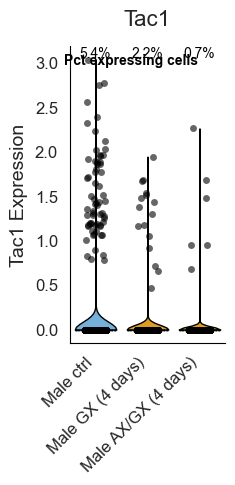

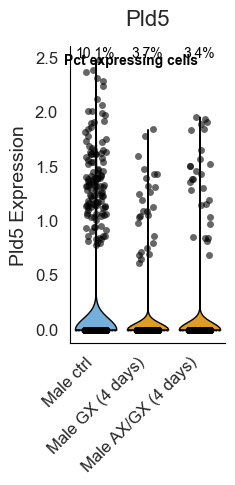

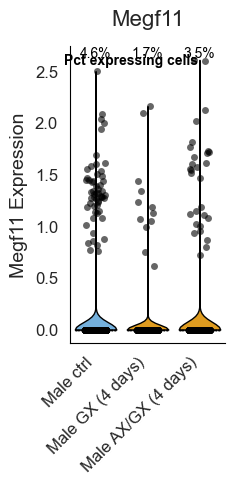

In [9]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Define the file paths.
file_paths = [
    "/Users/k23030440/Library/CloudStorage/OneDrive-King\'sCollegeLondon/PhD/Year_two/Aim 1/gonadectomy_analysis/SRX18224104.h5ad",
    "/Users/k23030440/Library/CloudStorage/OneDrive-King\'sCollegeLondon/PhD/Year_two/Aim 1/gonadectomy_analysis/SRX18224108.h5ad",
    "/Users/k23030440/Library/CloudStorage/OneDrive-King\'sCollegeLondon/PhD/Year_two/Aim 1/gonadectomy_analysis/SRX18224109.h5ad"
]

# Define the names for each sample
sample_names = ["Male ctrl", "Male GX (4 days)", "Male AX/GX (4 days)"]

# Define the gene of interest for plotting
gene_of_interests = ["Tac1","Pld5","Megf11"]
for gene_of_interest in gene_of_interests:

    print(f"Processing gene: {gene_of_interest}")

    # Initialize an empty list to store dataframes for plotting
    all_data_for_plotting = []
    # Initialize a dictionary to store non-zero percentage for each sample
    non_zero_percentages = {}

    # Loop through each file path to load data and extract gene expression
    for i, filepath in enumerate(file_paths):
        # Check if the file exists before attempting to load
        if not os.path.exists(filepath):
            print(f"Error: File not found at {filepath}. Skipping this sample.")
            continue

        try:
            # Load the AnnData object from the .h5ad file
            adata = sc.read_h5ad(filepath)
            adata = adata[adata.obs['new_cell_type'] == 'Stem_cells']

            # Ensure the gene of interest is present
            if gene_of_interest not in adata.var_names:
                print(f"Warning: Gene '{gene_of_interest}' not found in {filepath}. Skipping this sample.")
                continue

            # Extract raw expression values for calculating non-zero counts *before* normalization
            raw_expression_values = adata[:, gene_of_interest].X.toarray().flatten()

            # Calculate percentage of cells with non-zero counts
            num_cells_non_zero = (raw_expression_values > 0).sum()
            total_cells = len(raw_expression_values)
            if total_cells > 0:
                pct_non_zero = (num_cells_non_zero / total_cells) * 100
            else:
                pct_non_zero = 0
            non_zero_percentages[sample_names[i]] = pct_non_zero

            # Norm and log1p for actual plotting
            sc.pp.normalize_total(adata, target_sum=1e4)
            sc.pp.log1p(adata)
            expression_values = adata[:, gene_of_interest].X.toarray().flatten()

            # Create a temporary DataFrame for the current sample's gene expression
            sample_df = pd.DataFrame({
                'Expression': expression_values,
                'Sample': sample_names[i]
            })

            # Append this DataFrame to our list
            all_data_for_plotting.append(sample_df)

        except Exception as e:
            print(f"An error occurred while processing {filepath}: {e}")
            continue

    # Check if any data was successfully loaded for plotting
    if not all_data_for_plotting:
        print("No data was successfully loaded or found for plotting. Please check your file paths and gene name.")
    else:
        # Concatenate all individual sample DataFrames into a single DataFrame
        combined_df = pd.concat(all_data_for_plotting, ignore_index=True)

        # --- Plotting with Seaborn for Nature Publication Style ---
        sns.set_style("white")
        sns.set_context("paper", font_scale=1.2)
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = ['Arial']
        plt.rcParams['svg.fonttype'] = 'none'
        plt.rcParams['axes.linewidth'] = 0.8
        plt.rcParams['xtick.major.width'] = 0.8
        plt.rcParams['ytick.major.width'] = 0.8
        plt.rcParams['axes.edgecolor'] = 'black'

        # Create the figure and axes for the plot
        plt.figure(figsize=(2.5, 5)) # Increased width slightly for the new label
        ax = plt.gca() # Get the current axes to add annotations

        # Define a custom color palette with the specified hex codes
        # This is the key change to apply your desired colors
        colors = ["#63b3ed", "#ffa500", "#ffa500"]

        # Create the violin plot
        sns.violinplot(
            x='Sample',
            y='Expression',
            data=combined_df,
            palette=colors, # Use the custom color list here
            inner='quartile',
            linewidth=1.0,
            edgecolor='black',
            cut=0,
            ax=ax
        )

        # Add individual data points (stripplot)
        sns.stripplot(
            x='Sample',
            y='Expression',
            data=combined_df,
            color='black',
            size=5,
            jitter=0.2,
            alpha=0.6,
            ax=ax
        )

        # Determine a common y-position for the percentage text and its label
        percentage_y_pos = ax.get_ylim()[1] * 0.95

        # Add the "Pct expressing cells" label to the left
        ax.text(
            -0.6, # X-position to the left of the first sample (index 0)
            percentage_y_pos, # Y-position aligned with the percentages
            'Pct expressing cells',
            ha='left', # Horizontal alignment
            va='center', # Vertical alignment, aligning with the center of the percentage text
            fontsize=10,
            color='black',
            fontweight='bold'
        )

        # Add percentage of non-zero cells above each stripplot part
        for idx, sample_name in enumerate(sample_names):
            if sample_name in non_zero_percentages:
                pct = non_zero_percentages[sample_name]
                ax.text(
                    idx, # X-position corresponds to the sample index
                    percentage_y_pos, # Y-position near the top of the plot
                    f'{pct:.1f}%', # Formatted percentage string
                    ha='center', # Horizontal alignment
                    va='bottom', # Vertical alignment
                    fontsize=10,
                    color='black'
                )

        # Set plot title and labels
        plt.title(f'{gene_of_interest}', fontsize=16, pad=15)
        plt.xlabel('', fontsize=14, labelpad=10)
        plt.ylabel(f'{gene_of_interest} Expression', fontsize=14, labelpad=5)

        # Customize x-axis tick labels
        plt.xticks(fontsize=12, rotation=45, ha='right')
        plt.yticks(fontsize=12)

        # Remove the top and right spines
        sns.despine(top=True, right=True)

        # Ensure all elements fit within the figure area
        plt.tight_layout()

        folder = "/Users/k23030440/Library/CloudStorage/OneDrive-King'sCollegeLondon/PhD/Year_two/Aim 1/gonadectomy_analysis"
        plt.savefig(os.path.join(folder, f"{gene_of_interest}_violin_plot.svg"), format='svg', dpi=300, bbox_inches='tight')
        plt.savefig(os.path.join(folder, f"{gene_of_interest}_violin_plot.png"), format='png', dpi=300, bbox_inches='tight')
